In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [64]:
df = pd.read_csv("data/Loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [65]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [66]:
df.shape

(614, 13)

In [67]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [69]:
df.dropna(inplace=True)
df.duplicated().sum()

0

In [70]:
df.shape

(480, 13)

In [71]:
# label Encoding
df.replace({"Loan_Status":{"N":0,"Y":1}},inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_3328\31578142.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Loan_Status":{"N":0,"Y":1}},inplace=True)


In [72]:
df["Dependents"].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [73]:
df.replace({"Dependents":{"3+":4}},inplace=True)

In [74]:
df["Dependents"].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

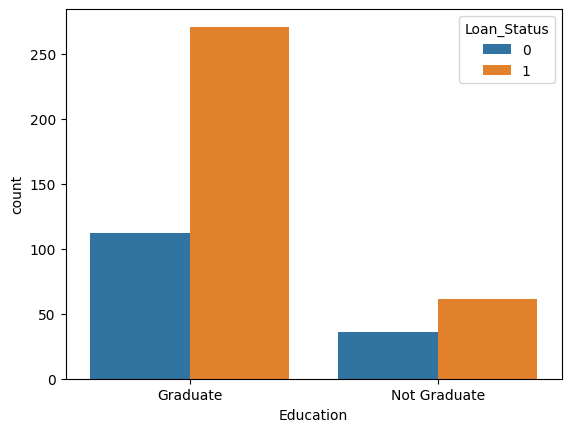

In [75]:
sns.countplot(data=df,x="Education",hue="Loan_Status")

<Axes: xlabel='Married', ylabel='count'>

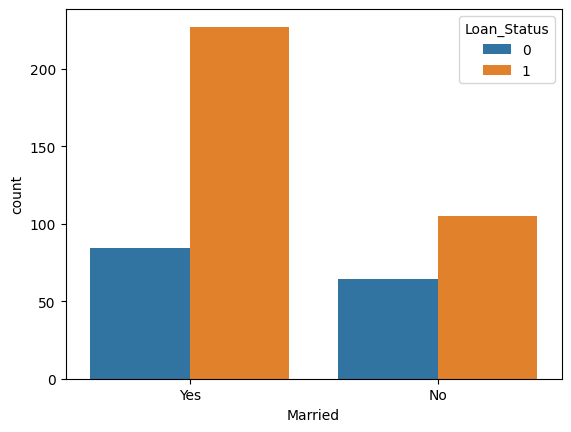

In [76]:
sns.countplot(data=df , x= "Married",hue="Loan_Status")

<Axes: xlabel='Gender', ylabel='count'>

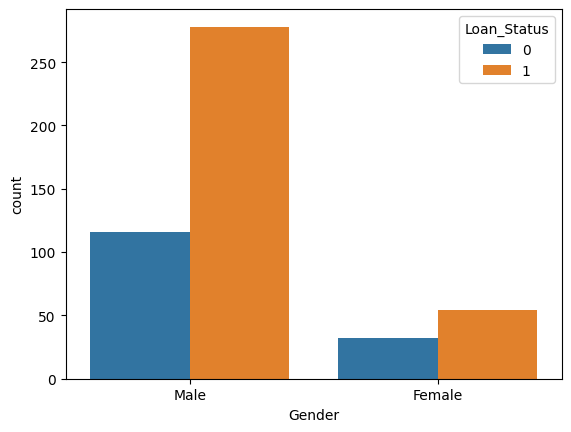

In [77]:
sns.countplot(data=df , x= "Gender",hue="Loan_Status")

<Axes: xlabel='Dependents', ylabel='count'>

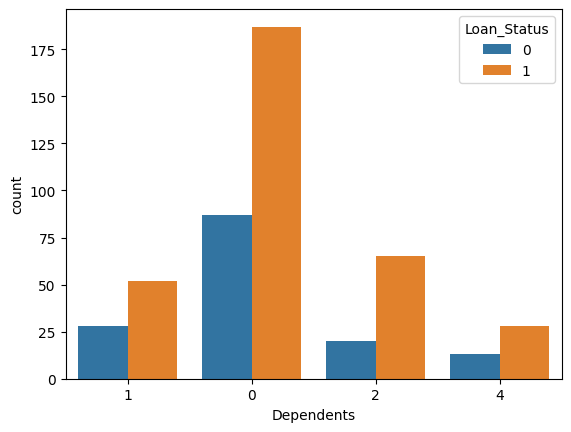

In [78]:
sns.countplot(data=df , x= "Dependents",hue="Loan_Status")

<Axes: xlabel='Self_Employed', ylabel='count'>

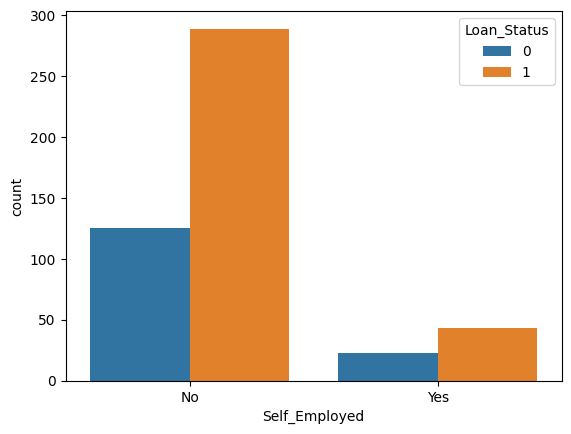

In [79]:
sns.countplot(data=df , x= "Self_Employed",hue="Loan_Status")

In [80]:
df.replace({"Married":{"No":0,"Yes":1},"Gender":{"Male":1,"Female":0},"Self_Employed":{"No":0,"Yes":1},
            "Property_Area":{"Rural":0,"Semiurban":1,"Urban":2},"Education":{"Not Graduate":0,"Graduate":1}},inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_3328\2852350602.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Married":{"No":0,"Yes":1},"Gender":{"Male":1,"Female":0},"Self_Employed":{"No":0,"Yes":1},


In [81]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


<Axes: >

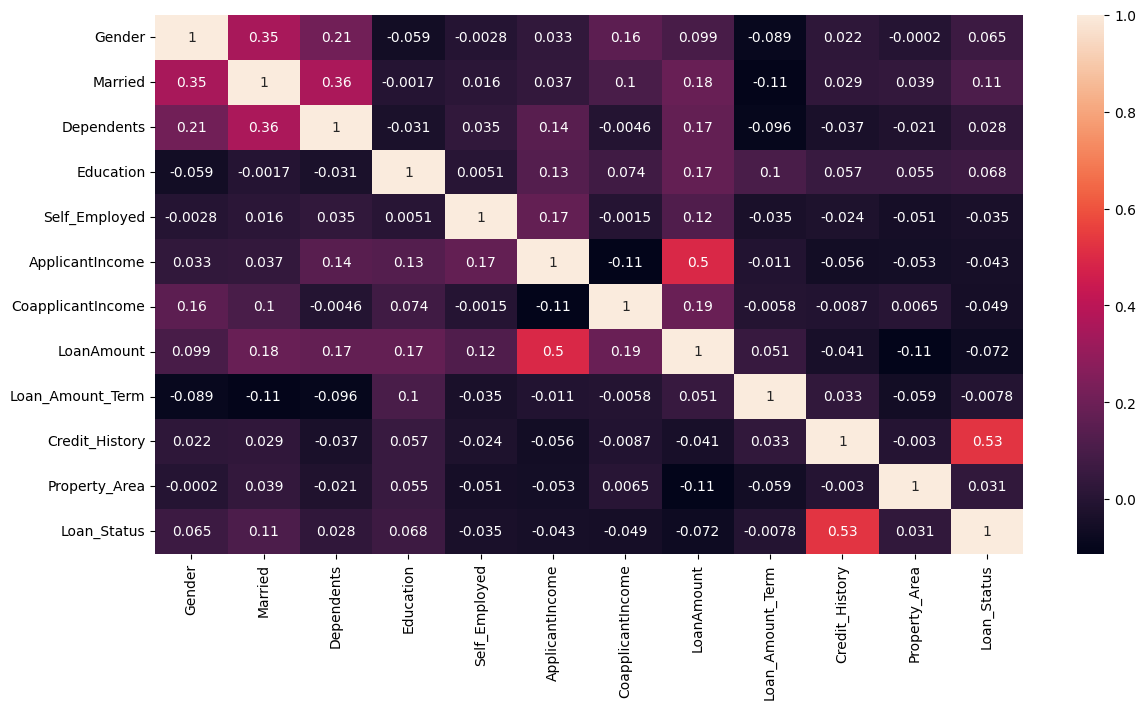

In [82]:
plt.figure(figsize=(14,7))
sns.heatmap(df.drop(columns=["Loan_ID"],axis=1).corr(),annot=True)


In [83]:
X=df.drop(columns=["Loan_ID","Loan_Status"],axis=1)
Y=df["Loan_Status"]

In [84]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2,stratify=Y)

In [85]:
model = SVC()

In [86]:
model.fit(X_train,Y_train)

SVC()

In [87]:
train_pred = model.predict(X_train)

In [88]:
print(accuracy_score(Y_train,train_pred))

0.7013888888888888


In [90]:
y_pred = model.predict(X_test)

In [91]:
print(accuracy_score(Y_test,y_pred))

0.6875
